### Oleksiy Anokhin (August 11, 2020)

### Analyzing Applications for Permanent Employment Certification

### MSCA 37014 | Python for Analytics | Professor S. Chaudhary | Team Project

In [109]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import json
import folium

# Set additional parameters
# Remove column display limits
pd.set_option('display.max_columns', None)
# pd.set_option('display.height', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)
plt.rcParams['figure.figsize'] = [15, 10]
sns.set_style("white")
plt.rcParams["axes.labelsize"] = 10

In [15]:
# Read data
employment = pd.read_csv('project_data_cleaned.csv')

# Print
employment.head()

,Unnamed: 0,case_status,received_date,decision_date,employer_city,employer_state_province,employer_num_employees,emp_contact_city,emp_contact_state_province,emp_contact_postal_code,agent_attorney_name,agent_attorney_firm_name,pw_skill_level,pw_wage,pw_unit_of_pay,worksite_city,worksite_state,worksite_postal_code,required_experience,required_experience_months,wage_offer_unit_of_pay,pw_soc_code,foreign_language_required,first_newspaper_name,second_newspaper_ad_name,country_of_citizenship,foreign_worker_birth_country,class_of_admission,foreign_worker_education,foreign_worker_info_major,foreign_worker_inst_of_ed
0,0,Denied,9/3/2009,4/30/2020,CHICAGO,ILLINOIS,2.0,chicago,ILLINOIS,60647,Christopher E Kurczaba,Kurczaba Law Offices,Level I,14.49,Hour,Chicago,ILLINOIS,60647,Y,24.0,Hour,43-6011.00,Y,Chicago Tribune,Chicago Tribune,POLAND,POLAND,B-2,High School,GENERAL,LICEUM EKONOMICZNE
1,1,Certified-Expired,3/29/2010,10/18/2019,GERMANTOWN,MARYLAND,0.0,GERMANTOWN,MARYLAND,20874,WINSTON W TSAI,"WINSTON TSAI, ESQ.",Level III,19.36,Hour,BURTONSVILLE,MARYLAND,20866,N,24.0,Hour,49-9042.00,N,WASHINGTON EXAMINER,WASHINGTON EXAMINER,PHILIPPINES,PHILIPPINES,B-2,High School,HIGH SCHOOL,SAN JACINTO NATIONAL HIGH SCHOOL
2,2,Denied,8/10/2010,4/30/2020,N. VALLEY STREAM,NEW YORK,3.0,N. VALLEY STREAM,NEW YORK,11580,DANIEL J SULLIVAN,"DANIEL J. SULLIVAN, ESQ.",Level IV,"78,645.00",Year,North Valley Stream,NEW YORK,11580,Y,24.0,Hour,47-2152.02,N,NY Post,NY Post,EL SALVADOR,EL SALVADOR,EWI,None,NaN,NaN
3,3,Certified,2/3/2011,5/28/2020,CAMPBELL,CALIFORNIA,29.0,Sunnyvale,CALIFORNIA,94086,Sonal Kinger,Baker Law Corporation,Level IV,"131,518.00",Year,Sunnyvale,CALIFORNIA,94086,Y,60.0,Year,15-1031.00,N,San Jose Mercury News,San Jose Mercury News,INDIA,INDIA,H-1B,Other,ELECTRONICS ENGINEERING COMPUTER SCIENCE,SHRI BAHAGUBHAI MAFATLAL POLYTECHNIC INSTITUTE
4,4,Denied,3/10/2011,6/17/2020,YONKERS,NEW YORK,43.0,YONKERS,NEW YORK,10703,VERNON L DUTTON,NON ATTORNEY,Level I,"53,643.00",Year,YONKERS,NEW YORK,10703,Y,24.0,Year,47-1011.01,N,NEW YORK POST,NEW YORK POST,IRELAND,IRELAND,NaN,High School,GENERAL,FALCARRAGH HIGH SCHOOL


**Calculate visas by type and count**

In [16]:
# Check visas by type
print(employment.class_of_admission.value_counts())

H-1B          47142
L-1            5150
F-1            4789
Not in USA     2915
TN             1192
B-2             951
E-2             725
O-1             391
H-4             330
H-2B            304
J-1             303
TPS             302
E-3             236
F-2             227
EWI             195
B-1             170
L-2             133
H-2A            115
E-1             108
Parolee         106
H-1B1            70
A1/A2            44
P-1              44
J-2              26
R-1              19
G-4              14
H-3              12
M-1              10
O-2               7
H-1A              7
C-1               7
I                 7
G-5               6
TD                6
P-3               5
VWT               5
R-2               5
G-1               3
Q                 3
O-3               2
C-3               1
VWB               1
Name: class_of_admission, dtype: int64


AS we can see, H-1B, L-1, and F-1 are dominating categories in our dataset.

In [17]:
# Create a dataframe of top 20 categories
employment_20 = employment.class_of_admission.value_counts().head(20)

# Convert to dataframe
employment_20 = pd.DataFrame(data = employment_20).reset_index()

# Rename columns
employment_20.columns = ['status', 'total']

# Print
employment_20

,status,total_workers
0,H-1B,47142
1,L-1,5150
2,F-1,4789
3,Not in USA,2915
4,TN,1192
5,B-2,951
6,E-2,725
7,O-1,391
8,H-4,330
9,H-2B,304


Text(0.5, 1.0, 'Types of status - 20 most frequent statuses')

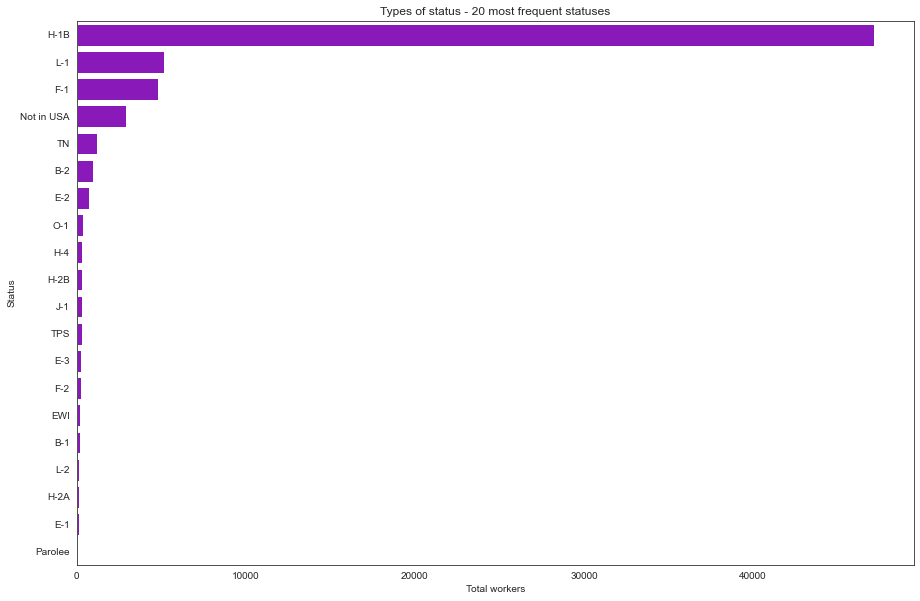

In [96]:
# Create a barplot
ax = sns.barplot(x = "total_workers", y = "status", data = employment_20, color = 'darkviolet')
ax.set(xlabel = 'Total workers', ylabel = 'Status')
ax.set_title('Types of status - 20 most frequent statuses')

**Calculate citizenship by country and type**

In [19]:
# Check visas by type
employment.country_of_citizenship.value_counts().head(20)

INDIA             35089
CHINA              9177
MEXICO             2837
CANADA             2353
SOUTH KOREA        2215
BRAZIL             1459
PHILIPPINES        1441
VIETNAM            1017
VENEZUELA           816
UNITED KINGDOM      762
PAKISTAN            748
TAIWAN              701
NEPAL               645
FRANCE              511
EL SALVADOR         507
TURKEY              494
COLOMBIA            457
BANGLADESH          455
RUSSIA              452
UKRAINE             421
Name: country_of_citizenship, dtype: int64

In [20]:
# Create a dataframe of top 20 categories
citizenship_20 = employment.country_of_citizenship.value_counts().head(20)

# Convert to dataframe
citizenship_20 = pd.DataFrame(data = citizenship_20).reset_index()

# Rename columns
citizenship_20.columns = ['country', 'total_workers']

# Print
citizenship_20

,country,total_workers
0,INDIA,35089
1,CHINA,9177
2,MEXICO,2837
3,CANADA,2353
4,SOUTH KOREA,2215
5,BRAZIL,1459
6,PHILIPPINES,1441
7,VIETNAM,1017
8,VENEZUELA,816
9,UNITED KINGDOM,762


Text(0.5, 1.0, 'Total workers by country')

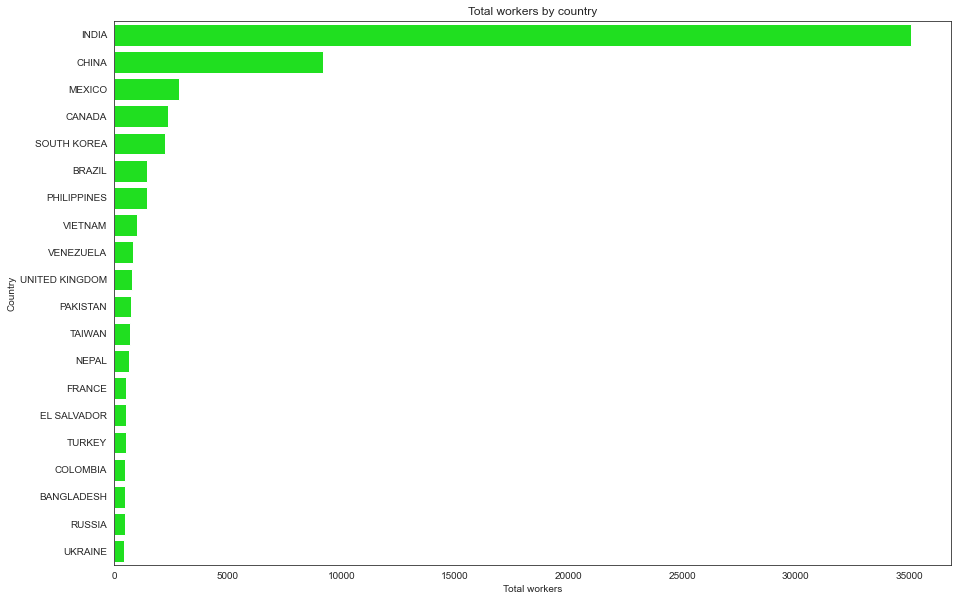

In [97]:
# Create a barplot
ax = sns.barplot(x = 'total_workers', y = 'country', data = citizenship_20, color = 'lime')
ax.set(xlabel = 'Total workers', ylabel = 'Country')
ax.set_title('Total workers by country')

**Analyze universities**

In [243]:
# See top 20 universities with the biggest number of students
universities_df = employment.foreign_worker_inst_of_ed.value_counts()

# Convert to dataframe
universities_df = pd.DataFrame(data = universities_df).reset_index()

# Rename columns
universities_df.columns = ['university', 'total_workers']

# Print
universities_df.head(20)

,university,total_workers
0,JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY,1588
1,ANNA UNIVERSITY,1327
2,UNIVERSITY OF SOUTHERN CALIFORNIA,1032
3,CARNEGIE MELLON UNIVERSITY,830
4,OSMANIA UNIVERSITY,691
5,UNIVERSITY OF MADRAS,577
6,UNIVERSITY OF MUMBAI,562
7,ARIZONA STATE UNIVERSITY,508
8,SAN JOSE STATE UNIVERSITY,499
9,COLUMBIA UNIVERSITY,494


In [23]:
universities_20 = employment.foreign_worker_inst_of_ed.value_counts().head(20)

# Convert to dataframe
universities_20 = pd.DataFrame(data = universities_20).reset_index()

# Rename columns
universities_20.columns = ['university', 'total_workers']

# Print
universities_20

,university,total_workers
0,JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY,1588
1,ANNA UNIVERSITY,1327
2,UNIVERSITY OF SOUTHERN CALIFORNIA,1032
3,CARNEGIE MELLON UNIVERSITY,830
4,OSMANIA UNIVERSITY,691
5,UNIVERSITY OF MADRAS,577
6,UNIVERSITY OF MUMBAI,562
7,ARIZONA STATE UNIVERSITY,508
8,SAN JOSE STATE UNIVERSITY,499
9,COLUMBIA UNIVERSITY,494


Text(0.5, 1.0, 'Number of workers per University')

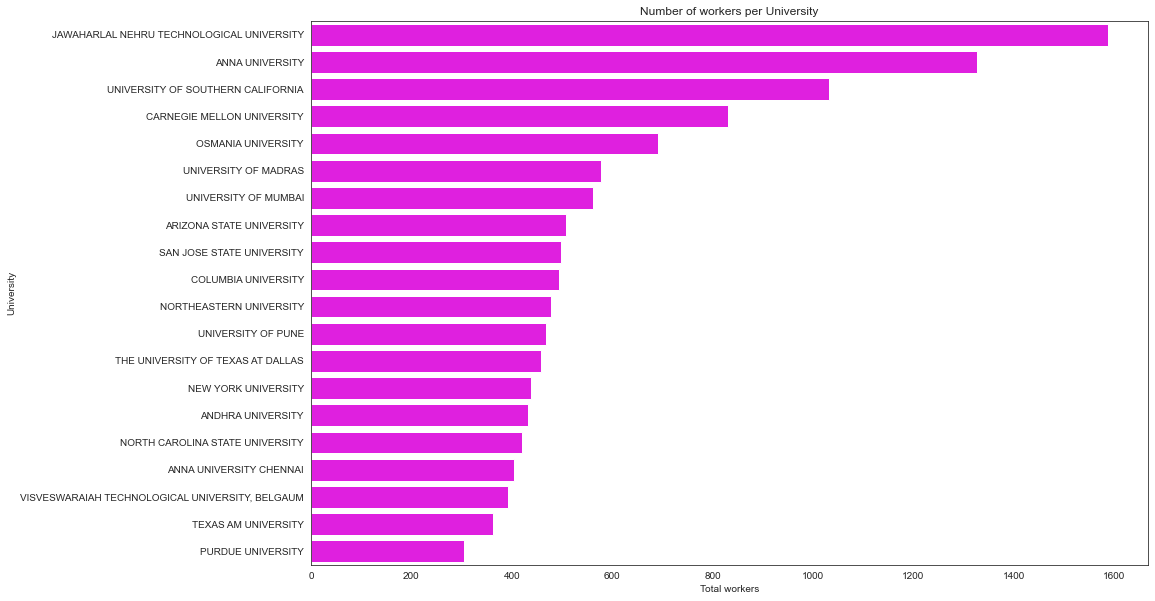

In [98]:
# Create a barplot
ax = sns.barplot(x = 'total_workers', y = 'university', data = universities_20, color = 'magenta')
ax.set(xlabel = 'Total workers', ylabel = 'University')
ax.set_title('Number of workers per University')

**Create a map of workers by country**

In [84]:
# Check visas by type
citizenship = employment.country_of_citizenship.value_counts()

# Convert to dataframe
citizenship = pd.DataFrame(data = citizenship).reset_index()

# Rename columns
citizenship.columns = ['country', 'total_workers']

# Tolower strings in the country column
citizenship['country'] = citizenship['country'].str.lower()

# Capitalize the first letter
citizenship['country'] = citizenship.country.str.title()  

# Print
citizenship

,country,total_workers
0,India,35089
1,China,9177
2,Mexico,2837
3,Canada,2353
4,South Korea,2215
5,Brazil,1459
6,Philippines,1441
7,Vietnam,1017
8,Venezuela,816
9,United Kingdom,762


**The problem with this map that there are differences in the spelling of countries, which generate NaNs** in our joined dataframe and it does not look good on a map.

- Bosnia and Herzegovina (Bosnia And Herzegovina)
- Central African Republic
- Chad
- Comoros
- Congo, Dem. Rep. (Democratic Republic Of Congo)
- Congo, Rep. (Republic Of Congo)
- Cote d'Ivoire (Ivory Coast, "'" creates a problem)
- Djibouti
- Equatorial Guinea
- Guinea
- Guinea-Bissau
- Hong Kong, China (Hong Kong)
- Korea, Dem. Rep.
- Korea, Rep. (South Korea)
- Mnyanmar
- **Russia (completely missing)**
- Sao Tome and Principe
- Slovak Republic (Slovakia)
- Somalia
- Trinidad and Tobago (Trinidad And Tobago)
- Yemen, Rep. (Yemen)

In [91]:
# Replace certain strings to improve our dataframe
citizenship['country'] = citizenship['country'].replace('Bosnia And Herzegovina', 'Bosnia and Herzegovina')
citizenship['country'] = citizenship['country'].replace('Democratic Republic Of Congo', 'Congo, Dem. Rep.')
citizenship['country'] = citizenship['country'].replace('Republic Of Congo', 'Congo, Rep.')
citizenship['country'] = citizenship['country'].replace('Hong Kong', 'Hong Kong, China')
citizenship['country'] = citizenship['country'].replace('South Korea', 'Korea, Rep.')
citizenship['country'] = citizenship['country'].replace('Slovakia', 'Slovak Republic')
citizenship['country'] = citizenship['country'].replace('Trinidad And Tobago', 'Trinidad and Tobago')
citizenship['country'] = citizenship['country'].replace('Yemen', 'Yemen, Rep.')

In [92]:
# Print the updated dataframe and check
citizenship

,country,total_workers
0,India,35089
1,China,9177
2,Mexico,2837
3,Canada,2353
4,"Korea, Rep.",2215
5,Brazil,1459
6,Philippines,1441
7,Vietnam,1017
8,Venezuela,816
9,United Kingdom,762


In [88]:
# Read gapminder dataset as a source of our data
df = px.data.gapminder().query("year==2007") #I am using this as a df template

# Print
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [89]:
# Join two dataframes - citizenship and df
citizenship_df = pd.merge(df, citizenship, how = 'left', on = 'country')

# Print
citizenship_df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,total_workers
0,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4,11.0
1,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8,109.0
2,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12,12.0
3,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24,1.0
4,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32,227.0
5,Australia,Oceania,2007,81.235,20434176,34435.367440,AUS,36,395.0
6,Austria,Europe,2007,79.829,8199783,36126.492700,AUT,40,25.0
7,Bahrain,Asia,2007,75.635,708573,29796.048340,BHR,48,5.0
8,Bangladesh,Asia,2007,64.062,150448339,1391.253792,BGD,50,455.0
9,Belgium,Europe,2007,79.441,10392226,33692.605080,BEL,56,46.0


In [93]:
# Map countries
fig = px.choropleth(citizenship_df, locations="iso_alpha",
                    color = "total_workers", # Our 'total_workers' indicator
                    hover_name = "country", 
                    color_continuous_scale=px.colors.sequential.Tealgrn)
fig.show()

The only one important country, which is still missing and very visible due to its size. The reason why I will not add it - Russia or Russian Federation is absent in the plotly shapefile for some reason. I will unlikely be able to add it manually, because it must be the part of the original file. Hence, I will skip it for now.

**Conclusion:** we can see that Indian workers dominate in this dataset, bringing 35000 people during the given period of time.

**Plot the universities, which provided the most workers**


In [148]:
# Read data
universities = pd.read_csv('Universities.csv')

# Print
universities

,university,total_workers,long,lat
0,JAWAHARLAL NEHRU TECHNOLOGICAL UNIVERSITY,1588,77.162560,28.546619
1,ANNA UNIVERSITY,1327,80.226490,12.804950
2,UNIVERSITY OF SOUTHERN CALIFORNIA,1032,-118.205017,34.044369
3,CARNEGIE MELLON UNIVERSITY,830,-78.650580,40.627780
4,OSMANIA UNIVERSITY,691,78.513802,17.402941
5,UNIVERSITY OF MADRAS,577,80.283200,13.066000
6,UNIVERSITY OF MUMBAI,562,72.831000,18.929300
7,ARIZONA STATE UNIVERSITY,508,-111.928001,33.424564
8,SAN JOSE STATE UNIVERSITY,499,-121.881100,37.335200
9,COLUMBIA UNIVERSITY,494,-73.962600,40.807500


In [166]:
# Tolower strings in the university column
universities['university'] = universities['university'].str.lower()

# Capitalize the first letter
universities['university'] = universities.university.str.title()  

# Print
universities.head(10)

,university,total_workers,long,lat
0,Jawaharlal Nehru Technological University,1588,77.162560,28.546619
1,Anna University,1327,80.226490,12.804950
2,University Of Southern California,1032,-118.205017,34.044369
3,Carnegie Mellon University,830,-78.650580,40.627780
4,Osmania University,691,78.513802,17.402941
5,University Of Madras,577,80.283200,13.066000
6,University Of Mumbai,562,72.831000,18.929300
7,Arizona State University,508,-111.928001,33.424564
8,San Jose State University,499,-121.881100,37.335200
9,Columbia University,494,-73.962600,40.807500


Lets visualize the **geolocation of top 10 universities, which brought the biggest groups of workers**.

Source: https://python-visualization.github.io/folium/quickstart.html#Getting-Started

In [216]:
# Create a map with geolocation markers

# Define a base
univ_map = folium.Map(location=[0, 0], zoom_start = 2, tiles = 'Stamen Terrain')

# Create markers
folium.Marker([28.546619, 77.16256], popup='<b>Jawaharlal Nehru Technological University - 1588 workers</b>',
             icon=folium.Icon(color='orange', icon='info-sign')).add_to(univ_map)
folium.Marker([12.80495, 80.22649], popup='<b>Anna University - 1327 workers</b>',
             icon=folium.Icon(color='orange', icon='info-sign')).add_to(univ_map)
folium.Marker([34.044369, -118.205017], popup='<b>University Of Southern California - 1032 workers</b>',
             icon=folium.Icon(color='blue', icon='info-sign')).add_to(univ_map)
folium.Marker([40.62778, -78.65058], popup='<b>Carnegie Mellon University - 830 workers</b>',
             icon=folium.Icon(color='blue', icon='info-sign')).add_to(univ_map)
folium.Marker([17.402941, 78.513802], popup='<b>Osmania University - 691 worker</b>',
             icon=folium.Icon(color='orange', icon='info-sign')).add_to(univ_map)
folium.Marker([13.066, 80.2832], popup='<b>University Of Madras - 577 workers</b>',
             icon=folium.Icon(color='orange', icon='info-sign')).add_to(univ_map)
folium.Marker([18.9293, 72.831], popup='<b>University Of Mumbai - 562 workers</b>',
             icon=folium.Icon(color='orange', icon='info-sign')).add_to(univ_map)
folium.Marker([33.424564, -111.928001], popup='<b>Arizona State University - 508 workers</b>',
             icon=folium.Icon(color='blue', icon='info-sign')).add_to(univ_map)
folium.Marker([37.3352, -121.8811], popup='<b>San Jose State University - 499 workers</b>',
             icon=folium.Icon(color='blue', icon='info-sign')).add_to(univ_map)
folium.Marker([40.8075, -73.9626], popup='<b>Columbia University - 494 workers</b>',
             icon=folium.Icon(color='blue', icon='info-sign')).add_to(univ_map)

# Print
univ_map

Now we can create a map with circles, mapping **universities, which produced the buggest number of applicants.**

In [241]:
# Create a map with circles by the number of workers

# Define a base
univ_map = folium.Map(location=[0, 0], zoom_start = 2, tiles = 'Stamen Toner')

# Create markers
folium.Circle([28.546619, 77.16256], radius = 1588000, popup='<b>Jawaharlal Nehru Technological University - 1588 workers</b>',
             color = 'orange').add_to(univ_map)
folium.Circle([12.80495, 80.22649], radius = 1327000, popup='<b>Anna University - 1327 workers</b>',
             color = 'orange').add_to(univ_map)
folium.Circle([34.044369, -118.205017], radius = 1032000, popup='<b>University Of Southern California - 1032 workers</b>',
             color = 'blue').add_to(univ_map)
folium.Circle([40.62778, -78.65058], radius = 830000, popup='<b>Carnegie Mellon University - 830 workers</b>',
             color = 'blue').add_to(univ_map)
folium.Circle([17.402941, 78.513802], radius = 691000, popup='<b>Osmania University - 691 worker</b>',
             color = 'orange').add_to(univ_map)
folium.Circle([13.066, 80.2832], radius = 577000, popup='<b>University Of Madras - 577 workers</b>',
             color = 'orange').add_to(univ_map)
folium.Circle([18.9293, 72.831], radius = 562000, popup='<b>University Of Mumbai - 562 workers</b>',
             color = 'orange').add_to(univ_map)
folium.Circle([33.424564, -111.928001], radius = 508000, popup='<b>Arizona State University - 508 workers</b>',
             color = 'blue').add_to(univ_map)
folium.Circle([37.3352, -121.8811], radius = 499000, popup='<b>San Jose State University - 499 workers</b>',
             color = 'blue').add_to(univ_map)
folium.Circle([40.8075, -73.9626], radius = 494000, popup='<b>Columbia University - 494 workers</b>',
             color = 'blue').add_to(univ_map)

# Print
univ_map

Finally, let's explore the University of Chicago a bit.

In [237]:
# Create a map for UChicago

# Define a base
uchicago_map = folium.Map(location=[42, -88], zoom_start = 9, tiles = 'Stamen Terrain')

# Create markers
folium.Marker([41.7886, -87.5987], popup='<b>The University of Chicago</b>',
             icon=folium.Icon(color='maroon', icon='info-sign')).add_to(uchicago_map)

# Print
uchicago_map

C:\Users\oleks\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning:

color argument of Icon should be one of: {'darkgreen', 'lightgreen', 'black', 'beige', 'darkblue', 'pink', 'white', 'darkred', 'orange', 'purple', 'cadetblue', 'lightred', 'darkpurple', 'lightgray', 'green', 'lightblue', 'red', 'blue', 'gray'}.



In [245]:
# Create a UChicago dataframe
uchicago_df = universities_df[universities_df['university'].str.contains("UNIVERSITY OF CHICAGO")]

# Print 
uchicago_df

# As we can see, we have six different types of spelling - 171 person in total (148 from UChicago and 23 from Booth).

,university,total_workers
119,THE UNIVERSITY OF CHICAGO,93
180,UNIVERSITY OF CHICAGO,55
740,THE UNIVERSITY OF CHICAGO BOOTH SCHOOL OF BUSI...,10
798,UNIVERSITY OF CHICAGO BOOTH SCHOOL OF BUSINESS,9
1812,"UNIVERSITY OF CHICAGO, BOOTH SCHOOL OF BUSINESS",3
10682,UNIVERSITY OF CHICAGO BOOTH SCHOOL OF BUSINESS,1
